## Contents:
1. Baseline Model: Simple Linear Regression <br>
    a. only numerical features<br>
    b. Adding categorical features<br>
    c. subset with p-values<0.05<br>
2. Baseline model vs other model CV /test <br>
3. Attempt with more feature engineering <br>
    a. CV / test on Model v.2 (new dataset)<br>
    b. More feature engineering <br>
    c. CV/test on Model v.3 <br>
4. Diagnostic plot
5. Prediction on new movies using entire dataset

In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import patsy
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_pickle('./data/final_df.pickle')

In [3]:
df

,YEAR,EBERT_RATING,RUNTIME,MOVIELENS_RATING,IMDB_RATING,OPEN_PROPORTION,GENRE_Comedy,GENRE_Crime-Horror,GENRE_Drama,GENRE_Family,...,GENRE_Romance,GENRE_Science Fiction,GENRE_Sport,GENRE_Thriller,GENRE_Western,MPAA_NC-17,MPAA_NR,MPAA_PG,MPAA_PG-13,MPAA_R
0,2013,3.5,106,3.642730,7.1,0.146705,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2012,2.5,98,3.451807,6.8,0.000792,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2012,2.0,106,2.939024,5.7,0.185719,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2012,2.0,104,3.225352,6.2,0.179616,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,2012,1.5,114,2.697248,5.4,0.280208,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,1979,4.0,100,4.021109,7.7,0.001078,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2187,1979,3.0,126,3.147650,6.3,0.033800,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2188,1971,3.0,181,3.895812,8.0,0.165965,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2189,1968,4.0,113,3.742695,7.4,0.799002,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## 1. Baseline Model: Simple Linear Regression

### a. Only numerical features

In [4]:
# Setting baseline model
# Taking numerical features first
df_subset = df.loc[:,['EBERT_RATING','YEAR','RUNTIME','MOVIELENS_RATING', 'IMDB_RATING','OPEN_PROPORTION']]

X = df_subset.drop('EBERT_RATING', axis=1)
X_OLS = sm.add_constant(X)
y = df_subset['EBERT_RATING']

model_1 = sm.OLS(y, X_OLS)
fit_1 = model_1.fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EBERT_RATING   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     258.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          1.38e-217
Time:                        12:10:57   Log-Likelihood:                -2324.3
No. Observations:                2189   AIC:                             4661.
Df Residuals:                    2183   BIC:                             4695.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.7849      3.158      1.199      0.231      -2.408       9.978
YEAR                -0.0022      0.002     -1.393      0.164      -0.005       0.001
RUNTIME              0.0024      0.001      2.824      0.005       0.001       0.004
MOVIELENS_RATING     0.7078      0.083      8.566      0.000       0.546       0.870
IMDB_RATING          0.1425      0.044      3.212      0.001       0.055       0.229
OPEN_PROPORTION     -0.8434      0.125     -6.727      0.000      -1.089      -0.598
==============================================================================
Omnibus:                       95.913   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.925
Skew:                          -0.524   Prob(JB):                     3.67e-24
Kurtosis:                       3.293   Cond. No.                     4.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#with only numerical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)
y_pred_train_1 = linreg_1.predict(X_train)
print("R2 value of train values: ", linreg_1.score(X_train, y_train))
print("RMSE value of train values: ", mean_squared_error(y_train, y_pred_train_1, squared=False))

y_pred_test_1 = linreg_1.predict(X_test)
print("R2 value of test values: ", linreg_1.score(X_test, y_test))
print("RMSE value of test values: ", mean_squared_error(y_test, y_pred_test_1, squared=False))

R2 value of train values:  0.37573016012073146
RMSE value of train values:  0.7009754800889472
R2 value of test values:  0.36008561284802143
RMSE value of test values:  0.6978232034870329


### b. Adding cateogrical features

In [6]:
# Adding categorical features in for analysis
X2 = df.drop('EBERT_RATING', axis=1)
X2_OLS = sm.add_constant(X2)
y2 = df['EBERT_RATING']

model_2 = sm.OLS(y2, X2_OLS)
fit_2 = model_2.fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EBERT_RATING   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     54.69
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          9.29e-209
Time:                        12:10:57   Log-Likelihood:                -2297.6
No. Observations:                2189   AIC:                             4647.
Df Residuals:                    2163   BIC:                             4795.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             4.6033      3.279      1.404      0.161      -1.828      11.035
YEAR                             -0.0023      0.002     -1.385      0.166      -0.005       0.001
RUNTIME                           0.0026      0.001      2.966      0.003       0.001       0.004
MOVIELENS_RATING                  0.7162      0.084      8.544      0.000       0.552       0.881
IMDB_RATING                       0.1170      0.045      2.605      0.009       0.029       0.205
OPEN_PROPORTION                  -0.7997      0.127     -6.280      0.000      -1.049      -0.550
GENRE_Comedy                     -0.5560      0.230     -2.418      0.016      -1.007      -0.105
GENRE_Crime-Horror               -0.3151      0.242     -1.305      0.192      -0.789       0.159
GENRE_Drama                      -0.2746      0.227     -1.211      0.226      -0.719       0.170
GENRE_Family                     -0.1700      0.231     -0.735      0.462      -0.623       0.283
GENRE_Fantasy-Mystery            -0.0884      0.255     -0.346      0.729      -0.589       0.412
GENRE_Foreign                    -0.3949      0.253     -1.560      0.119      -0.891       0.101
GENRE_History-Documentary-War    -0.2134      0.234     -0.911      0.362      -0.673       0.246
GENRE_Indie                      -0.1725      0.232     -0.742      0.458      -0.628       0.283
GENRE_Musical                    -0.2521      0.239     -1.053      0.292      -0.721       0.217
GENRE_Other                      -0.4347      0.294     -1.479      0.139      -1.011       0.142
GENRE_Romance                    -0.3253      0.223     -1.457      0.145      -0.763       0.112
GENRE_Science Fiction            -0.4373      0.225     -1.940      0.053      -0.879       0.005
GENRE_Sport                      -0.2344      0.241     -0.972      0.331      -0.708       0.239
GENRE_Thriller                   -0.3184      0.223     -1.430      0.153      -0.755       0.118
GENRE_Western                    -0.3803      0.258     -1.473      0.141      -0.887       0.126
MPAA_NC-17                       -0.1391      0.306     -0.454      0.650      -0.740       0.462
MPAA_NR                          -0.1786      0.132     -1.349      0.178      -0.438       0.081
MPAA_PG                          -0.2712      0.107     -2.534      0.011      -0.481      -0.061
MPAA_PG-13                       -0.2987      0.110     -2.726      0.006      -0.514      -0.084
MPAA_R                           -0.2267      0.109     -2.071      0.038      -0.441      -0.012
==============================================================================
Omnibus:                       89.562   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.925
Skew

In [7]:
#added categorical features
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=123)

linreg_2 = LinearRegression()
linreg_2.fit(X2_train, y2_train)
y_pred_train_2 = linreg_2.predict(X2_train)
print("R2 value of train values: ", linreg_2.score(X2_train, y2_train))
print("RMSE value of train values: ", mean_squared_error(y2_train, y_pred_train_2, squared=False))

y_pred_test_2 = linreg_2.predict(X2_test)
print("R2 value of test values: ", linreg_2.score(X2_test, y2_test))
print("RMSE value of test values: ", mean_squared_error(y2_test, y_pred_test_2, squared=False))

R2 value of train values:  0.3961258298277356
RMSE value of train values:  0.6894295227504635
R2 value of test values:  0.3585595128479495
RMSE value of test values:  0.6986548098963202


Adding categorical features seem to have improved R2 value. However, there are a few features with high P-values. I might start with features that have p-values < 0.05 and build up from there.

### c. Subset with p-values <0.05

In [8]:
# subset with p-values < 0.05
selected_columns = ['EBERT_RATING', 'MOVIELENS_RATING', 'IMDB_RATING', 'RUNTIME', 'MPAA_R',
                       'OPEN_PROPORTION', 'GENRE_Comedy','MPAA_PG-13','GENRE_Science Fiction',
                       'MPAA_PG']
df_subset2 = df.loc[:, selected_columns ]

X3 = df_subset2.drop('EBERT_RATING', axis=1)
X3_OLS = sm.add_constant(X3)
y3 = df_subset2['EBERT_RATING']

model_3 = sm.OLS(y3, X3_OLS)
fit_3 = model_3.fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EBERT_RATING   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     149.7
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          2.37e-220
Time:                        12:10:57   Log-Likelihood:                -2307.0
No. Observations:                2189   AIC:                             4634.
Df Residuals:                    2179   BIC:                             4691.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3164      0.159     -1.995      0.046      -0.627      -0.005
MOVIELENS_RATING          0.6912      0.082      8.461      0.000       0.531       0.851
IMDB_RATING               0.1379      0.044      3.166      0.002       0.052       0.223
RUNTIME                   0.0024      0.001      2.863      0.004       0.001       0.004
MPAA_R                   -0.1555      0.066     -2.351      0.019      -0.285      -0.026
OPEN_PROPORTION          -0.7848      0.125     -6.275      0.000      -1.030      -0.540
GENRE_Comedy             -0.2646      0.066     -4.019      0.000      -0.394      -0.136
MPAA_PG-13               -0.2265      0.068     -3.339      0.001      -0.360      -0.093
GENRE_Science Fiction    -0.1522      0.051     -2.978      0.003      -0.252      -0.052
MPAA_PG                  -0.1505      0.072     -2.093      0.036      -0.291      -0.009
==============================================================================
Omnibus:                       93.423   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.986
Skew:                          -0.513   Prob(JB):                     1.59e-23
Kurtosis:                       3.314   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#with features p-values<0.05
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=123)

linreg_3 = LinearRegression()
linreg_3.fit(X3_train, y3_train)
y_pred_train_3 = linreg_3.predict(X3_train)
print("baseline model R2 value of train values: ", linreg_3.score(X3_train, y3_train))
print("baseline model RMSE value of train values: ", mean_squared_error(y3_train, y_pred_train_3, squared=False))

y_pred_test_3 = linreg_3.predict(X3_test)
print("baseline model R2 value of test values: ", linreg_3.score(X3_test, y3_test))
print("baseline model RMSE value of test values: ", mean_squared_error(y3_test, y_pred_test_3, squared=False))

baseline model R2 value of train values:  0.3902919611685435
baseline model RMSE value of train values:  0.6927517164747651
baseline model R2 value of test values:  0.3576287961384931
baseline model RMSE value of test values:  0.6991614929129264


In [10]:
lm = LinearRegression()
lm.fit(X3, y3)
y_pred = lm.predict(X3)
print("baseline model R2 value of whole dataset: ", lm.score(X3,y3))
print("baseline model RMSE value of whole dataset: ",mean_squared_error(y3, y_pred, squared=False))

baseline model R2 value of whole dataset:  0.3820180893418966
baseline model RMSE value of whole dataset:  0.6941662325725839


Okay. I got my baseline model down. It seems like I got a R-squared of 0.382 which is low and definitely needs improvement. <br>
The scores on the training set and testing set are close but low, which indicates an underfitting model. And the model prediction is off by a bit more than half a star(0.7)

## 2. Baseline model vs other model CV /test

In [11]:
from sklearn.model_selection import KFold 
#Use baseline dataset and use CV to find the best performing model

selected_coloumns = ['EBERT_RATING', 'MOVIELENS_RATING', 'IMDB_RATING', 'RUNTIME', 'MPAA_R',
                       'OPEN_PROPORTION', 'GENRE_Comedy','MPAA_PG-13','GENRE_Science Fiction',
                       'MPAA_PG']
model_df = df.loc[:, selected_columns]
X, y = model_df.drop('EBERT_RATING', axis=1), model_df.EBERT_RATING

#Build a Hold Out Set to test different models
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data into multiple folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Cross Validation on each Model to find the best candidate
# run the CV
X, y = np.array(X), np.array(y)
#collect the validation results for all models
cv_lm_r2s, cv_lm_rid_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s = [], [], [], [] 

cv_lm_r2s_tr, cv_lm_rid_r2s_tr, cv_lm_lasso_r2s_tr, cv_lm_poly_r2s_tr = [], [], [], []

# cv_lm_pred, cv_lm_rid_pred, cv_lm_lasso_pred, cv_lm_poly_pred = [], [], [], []

# cv_lm_pred_tr, cv_lm_rid_pred_tr, cv_lm_lasso_pred_tr, cv_lm_poly_pred_tr = [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Set up models we're choosing from:
    lm = LinearRegression()
    lm_rid = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=0.005)
    lm_poly = LinearRegression()
    
    # Feature scaling for train, val and test 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Simple Linear Regression
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))    
    lm_train_preds = lm.predict(X_train)
    linear_train_rmse = mean_squared_error(y_train, lm_train_preds, squared=False)
    linear_train_mae = mean_absolute_error(y_train, lm_train_preds)
    
    lm_val_preds = lm.predict(X_val)
    linear_val_rmse = mean_squared_error(y_val, lm_val_preds, squared=False)
    linear_val_mae = mean_absolute_error(y_val, lm_val_preds)
    
    
    # Ridge model
    lm_rid.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_rid.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_rid.score(X_train_scaled, y_train))
    
    rid_train_preds = lm_rid.predict(X_train_scaled)
    ridge_train_rmse = mean_squared_error(y_train, rid_train_preds, squared=False)
    ridge_train_mae = mean_absolute_error(y_train, rid_train_preds)
    
    rid_val_preds = lm_rid.predict(X_val_scaled)
    ridge_val_rmse = mean_squared_error(y_val, rid_val_preds, squared=False)
    ridge_val_mae = mean_absolute_error(y_val, rid_val_preds)
    
    # Lasso model
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    lasso_train_preds = lm_lasso.predict(X_train_scaled)
    lasso_train_rmse = mean_squared_error(y_train, lasso_train_preds, squared=False)
    lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
    
    lasso_val_preds = lm_lasso.predict(X_val_scaled)
    lasso_val_rmse = mean_squared_error(y_val, lasso_val_preds, squared=False)
    lasso_val_mae = mean_absolute_error(y_val, lasso_val_preds)
        
    # Poly model
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly_r2s_tr.append(lm_poly.score(X_train_poly, y_train))
    
    poly_train_preds = lm_poly.predict(X_train_poly)
    poly_train_rmse = mean_squared_error(y_train, poly_train_preds, squared=False)
    poly_train_mae = mean_absolute_error(y_train, poly_train_preds)
    
    poly_val_preds = lm_poly.predict(X_val_poly)
    poly_val_rmse = mean_squared_error(y_val, poly_val_preds, squared=False)
    poly_val_mae = mean_absolute_error(y_val, poly_val_preds)
    

print("Baseline Model -","\n")
print("Training set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s_tr)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print("Simple RMSE: ", linear_train_rmse)
print("Simple MAE: ", linear_train_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}')
print("Ridge RMSE: ", ridge_train_rmse)
print("Ridge MAE: ", ridge_train_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s_tr)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print("Lasso RMSE: ", lasso_train_rmse)
print("Lasso MAE: ", lasso_train_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s_tr)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s_tr):.3f} +- {np.std(cv_lm_poly_r2s_tr):.3f}')
print("Poly RMSE: ", poly_train_rmse)
print("Poly MAE: ", poly_train_mae, "\n")

print("Val set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print("Simple RMSE: ", linear_val_rmse)
print("Simple MAE: ", linear_val_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}')
print("Ridge RMSE: ", ridge_val_rmse)
print("Ridge MAE: ", ridge_val_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')
print("Lasso RMSE: ", lasso_val_rmse)
print("Lasso MAE: ", lasso_val_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print("Poly RMSE: ", poly_val_rmse)
print("Poly MAE: ", poly_val_mae, "\n")

Baseline Model - 

Training set scores:  

Simple regression scores:  [0.3875002763681915, 0.38086248454051674, 0.38392580278430555, 0.3830785559156842, 0.3865841711613325]
Simple mean cv r^2: 0.384 +- 0.002
Simple RMSE:  0.6941945324041752
Simple MAE:  0.5577107679691509 

Ridge scores:  [0.38750012992224747, 0.3808622839353071, 0.3839255083033888, 0.3830783137757443, 0.38658401453271063]
Ridge mean cv r^2: 0.384 +- 0.002
Ridge RMSE:  0.6941946210314333
Ridge MAE:  0.5577247991899034 

Lasso scores:  [0.386435658015881, 0.3797799734098627, 0.38301810171797823, 0.3824104461844834, 0.3859420582242725]
Lasso mean cv r^2: 0.384 +- 0.002
Lasso RMSE:  0.6945577727046347
Lasso MAE:  0.5589886833911136 

Poly scores:  [0.4084946641861539, 0.40338333939979243, 0.411814996359547, 0.40710026029208524, 0.40991693249736405]
Poly mean cv r^2: 0.408 +- 0.003
Poly RMSE:  0.6808638494355652
Poly MAE:  0.5479085047742686 

Val set scores:  

Simple regression scores:  [0.35531681477290455, 0.3857621357

The scores appear to be steady in each model and each fold. They are close between train and val (both low), which can suggest that the model is underfit and need to add more complexity. <br> 
Except for Polynomial Regression, it has higher score in training vs. validation, which suggests that this can be overfitting.

In [12]:
#test - linear
lm.fit(X, y)
lm_preds = lm.predict(X_test)

linear_test_rmse = mean_squared_error(y_test, lm_preds, squared=False)
linear_test_mae = mean_absolute_error(y_test, lm_preds)
linear_test_r2 = lm.score(X_test, y_test)

#test - Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
lm_rid.fit(X_scaled, y)
ridge_preds = lm_rid.predict(X_test_scaled)

ridge_test_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
ridge_test_mae = mean_absolute_error(y_test, ridge_preds)
ridge_test_r2 = lm_rid.score(X_test_scaled, y_test)

#test - Lasso
lm_lasso.fit(X_scaled, y)
lasso_preds = lm_lasso.predict(X_test_scaled)

lasso_test_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y_test, lasso_preds)
lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)

#test - poly
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

lm_poly.fit(X_poly, y)
poly_preds = lm_poly.predict(X_test_poly)

poly_test_rmse = mean_squared_error(y_test, poly_preds, squared=False)
poly_test_mae = mean_absolute_error(y_test, poly_preds)
poly_test_r2 = lm_poly.score(X_test_poly, y_test)

column_list = ['Model_Type', 'R-squared', 'RMSE', 'MAE']

linear_dict = dict(zip(column_list, ['Simple Linear', linear_test_r2, linear_test_rmse, linear_test_mae]))
ridge_dict = dict(zip(column_list, ['Ridge', ridge_test_r2, ridge_test_rmse, ridge_test_mae]))
lasso_dict = dict(zip(column_list, ['LASSO', lasso_test_r2, lasso_test_rmse, lasso_test_mae]))
poly_dict = dict(zip(column_list, ['Polynomial', poly_test_r2, poly_test_rmse, poly_test_mae]))

score_df = pd.DataFrame([linear_dict, ridge_dict, lasso_dict, poly_dict])
score_df

,Model_Type,R-squared,RMSE,MAE
0,Simple Linear,0.372719,0.706341,0.557749
1,Ridge,0.372669,0.706369,0.557772
2,LASSO,0.370874,0.707379,0.558695
3,Polynomial,0.347299,0.720510,0.562520


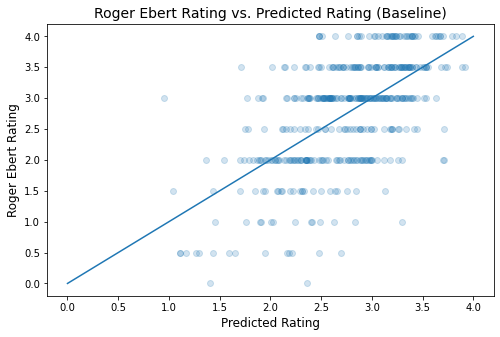

In [13]:
# predict on unseen data (Baseline)
plt.figure(figsize=(8,5))
plt.scatter( lm_preds, y_test, alpha=0.2)
plt.plot([0,4], [0,4])
plt.title('Roger Ebert Rating vs. Predicted Rating (Baseline)', fontsize=14)
plt.xlabel('Predicted Rating', fontsize=12)
plt.ylabel('Roger Ebert Rating', fontsize=12)
plt.savefig('./image/baseline_comparison.png');

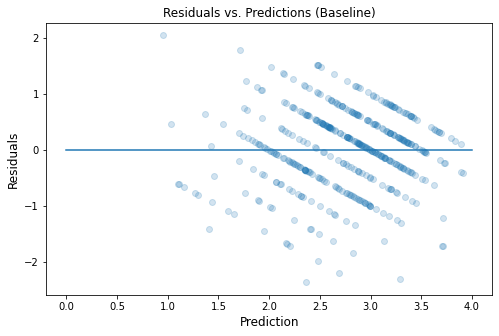

In [14]:
residuals = y_test - lm_preds
plt.figure(figsize=(8,5))
plt.scatter(lm_preds, residuals, alpha=0.2)
plt.plot([0,4], [0,0])
plt.title("Residuals vs. Predictions (Baseline)")
plt.xlabel("Prediction", size=12)
plt.ylabel("Residuals", size=12)
plt.savefig('./image/residual_baseline.png');

## 3. Attempt with more feature engineering

added subgenre dummy variables to the df

In [15]:
new_df = pd.read_pickle('./data/final_df2.pickle')

In [16]:
new_X = new_df.drop('EBERT_RATING', axis=1)
new_X_OLS = sm.add_constant(new_X)
new_y = new_df['EBERT_RATING']

new_model = sm.OLS(new_y, new_X_OLS)
new_fit = new_model.fit()
new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EBERT_RATING   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     31.68
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          1.02e-201
Time:                        12:10:59   Log-Likelihood:                -2275.6
No. Observations:                2189   AIC:                             4643.
Df Residuals:                    2143   BIC:                             4905.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             3.5950      3.301      1.089      0.276      -2.878      10.068
YEAR                             -0.0017      0.002     -1.046      0.296      -0.005       0.002
RUNTIME                           0.0024      0.001      2.671      0.008       0.001       0.004
MOVIELENS_RATING                  0.6873      0.085      8.089      0.000       0.521       0.854
IMDB_RATING                       0.1282      0.045      2.826      0.005       0.039       0.217
OPEN_PROPORTION                  -0.8098      0.128     -6.341      0.000      -1.060      -0.559
GENRE_Comedy                     -0.6252      0.235     -2.661      0.008      -1.086      -0.164
GENRE_Crime-Horror               -0.3420      0.252     -1.359      0.174      -0.835       0.151
GENRE_Drama                      -0.3285      0.235     -1.399      0.162      -0.789       0.132
GENRE_Family                     -0.1967      0.244     -0.806      0.421      -0.676       0.282
GENRE_Fantasy-Mystery            -0.1438      0.266     -0.541      0.589      -0.665       0.378
GENRE_Foreign                    -0.5190      0.264     -1.963      0.050      -1.037      -0.001
GENRE_History-Documentary-War    -0.3082      0.246     -1.254      0.210      -0.790       0.174
GENRE_Indie                      -0.2699      0.245     -1.103      0.270      -0.749       0.210
GENRE_Musical                    -0.3186      0.251     -1.267      0.205      -0.812       0.174
GENRE_Other                      -0.5334      0.303     -1.762      0.078      -1.127       0.060
GENRE_Romance                    -0.3802      0.236     -1.611      0.107      -0.843       0.083
GENRE_Science Fiction            -0.5413      0.238     -2.273      0.023      -1.008      -0.074
GENRE_Sport                      -0.3282      0.252     -1.300      0.194      -0.823       0.167
GENRE_Thriller                   -0.3254      0.233     -1.393      0.164      -0.783       0.133
GENRE_Western                    -0.4847      0.269     -1.803      0.072      -1.012       0.042
MPAA_NC-17                       -0.2288      0.308     -0.743      0.457      -0.832       0.375
MPAA_NR                          -0.1896      0.137     -1.384      0.166      -0.458       0.079
MPAA_PG                          -0.2854      0.108     -2.633      0.009      -0.498      -0.073
MPAA_PG-13                       -0.3130      0.113     -2.761      0.006      -0.535      -0.091
MPAA_R                           -0.2533      0.114     -2.221      0.026      -0.477      -0.030
SUB_GENRE_Adventure              -0.1002      0.124     -0.808      0.419      -0.343       0.143
SUB_GENRE_Animation              -0.1143      0.196     -0.582      0.561      -0.499       0.271
SUB_GENRE_Comedy                 -0.0523     

It appears that the R2 value has improved with the new dataset. I'll do a CV test and see how well it actually performs

### a. CV / test on Model v.2 (new dataset)
you can check out the notebook 3a_More FE and Selection for details

In [17]:
#Use new dataset and use CV to find the best performing model
X, y = new_X, new_y

#Build a Hold Out Set to test different models
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data into multiple folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Cross Validation on each Model to find the best candidate
# run the CV
X, y = np.array(X), np.array(y)

# collect the validation results for all models
cv_lm_r2s, cv_lm_r2s_tr = [], []
cv_lm_rid_r2s, cv_lm_rid_r2s_tr = [], []
cv_lm_lasso_r2s, cv_lm_lasso_r2s_tr = [], []
cv_lm_poly_r2s, cv_lm_poly_r2s_tr = [], []
cv_lm_poly_ridge_r2s, cv_lm_poly_ridge_r2s_tr = [], []
cv_lm_poly_lasso_r2s, cv_lm_poly_lasso_r2s_tr= [], []


for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Feature scaling for train, val and test 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)    
    
    ## Set up models we're choosing from:  

    # Simple Linear Regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))    
    lm_train_preds = lm.predict(X_train)
    linear_train_rmse = mean_squared_error(y_train, lm_train_preds, squared=False)
    linear_train_mae = mean_absolute_error(y_train, lm_train_preds)
    
    lm_val_preds = lm.predict(X_val)
    linear_val_rmse = mean_squared_error(y_val, lm_val_preds, squared=False)
    linear_val_mae = mean_absolute_error(y_val, lm_val_preds)
 #---------------------------------------------------------------------------------------#   
    # Ridge model
    lm_rid = Ridge(alpha=2)
    lm_rid.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_rid.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_rid.score(X_train_scaled, y_train))
    
    rid_train_preds = lm_rid.predict(X_train_scaled)
    ridge_train_rmse = mean_squared_error(y_train, rid_train_preds, squared=False)
    ridge_train_mae = mean_absolute_error(y_train, rid_train_preds)
    
    rid_val_preds = lm_rid.predict(X_val_scaled)
    ridge_val_rmse = mean_squared_error(y_val, rid_val_preds, squared=False)
    ridge_val_mae = mean_absolute_error(y_val, rid_val_preds)
 
 #---------------------------------------------------------------------------------------# 
    # Lasso model
    lm_lasso = Lasso(alpha=0.006)
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    lasso_train_preds = lm_lasso.predict(X_train_scaled)
    lasso_train_rmse = mean_squared_error(y_train, lasso_train_preds, squared=False)
    lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
    
    lasso_val_preds = lm_lasso.predict(X_val_scaled)
    lasso_val_rmse = mean_squared_error(y_val, lasso_val_preds, squared=False)
    lasso_val_mae = mean_absolute_error(y_val, lasso_val_preds)
 #---------------------------------------------------------------------------------------#         
    # Poly model
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly_r2s_tr.append(lm_poly.score(X_train_poly, y_train))
    
    poly_train_preds = lm_poly.predict(X_train_poly)
    poly_train_rmse = mean_squared_error(y_train, poly_train_preds, squared=False)
    poly_train_mae = mean_absolute_error(y_train, poly_train_preds)
    
    poly_val_preds = lm_poly.predict(X_val_poly)
    poly_val_rmse = mean_squared_error(y_val, poly_val_preds, squared=False)
    poly_val_mae = mean_absolute_error(y_val, poly_val_preds)
 #---------------------------------------------------------------------------------------#     
    # Poly + Ridge model
    lm_poly_ridge = Ridge(alpha=2)
    lm_poly_ridge.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_ridge_r2s.append(lm_poly_ridge.score(X_val_poly_scaled, y_val))
    cv_lm_poly_ridge_r2s_tr.append(lm_poly_ridge.score(X_train_poly_scaled, y_train))
    
    poly_ridge_train_preds = lm_poly_ridge.predict(X_train_poly_scaled)
    poly_ridge_train_rmse = mean_squared_error(y_train, poly_ridge_train_preds, squared=False)
    poly_ridge_train_mae = mean_absolute_error(y_train, poly_ridge_train_preds)
    
    poly_ridge_val_preds = lm_poly_ridge.predict(X_val_poly_scaled)
    poly_ridge_val_rmse = mean_squared_error(y_val, poly_ridge_val_preds, squared=False)
    poly_ridge_val_mae = mean_absolute_error(y_val, poly_ridge_val_preds)       
 #---------------------------------------------------------------------------------------#    
    # Poly + Lasso 
    lm_poly_lasso = Lasso(alpha=0.006)
    lm_poly_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_r2s.append(lm_poly_lasso.score(X_val_poly_scaled, y_val))
    cv_lm_poly_lasso_r2s_tr.append(lm_poly_lasso.score(X_train_poly_scaled, y_train))
    
    poly_lasso_train_preds = lm_poly_lasso.predict(X_train_poly_scaled)
    poly_lasso_train_rmse = mean_squared_error(y_train, poly_lasso_train_preds, squared=False)
    poly_lasso_train_mae = mean_absolute_error(y_train, poly_lasso_train_preds)
    
    poly_lasso_val_preds = lm_poly_lasso.predict(X_val_poly_scaled)
    poly_lasso_val_rmse = mean_squared_error(y_val, poly_lasso_val_preds, squared=False)
    poly_lasso_val_mae = mean_absolute_error(y_val, poly_lasso_val_preds)    
 ########################################################################################
 ######################################################################################## 
print("Models with new dataset - ", "\n")
print("Training set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s_tr)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print("Simple RMSE: ", linear_train_rmse)
print("Simple MAE: ", linear_train_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}')
print("Ridge RMSE: ", ridge_train_rmse)
print("Ridge MAE: ", ridge_train_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s_tr)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print("Lasso RMSE: ", lasso_train_rmse)
print("Lasso MAE: ", lasso_train_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s_tr)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s_tr):.3f} +- {np.std(cv_lm_poly_r2s_tr):.3f}')
print("Poly RMSE: ", poly_train_rmse)
print("Poly MAE: ", poly_train_mae, "\n")

print('Poly-Ridge scores: ', cv_lm_poly_ridge_r2s_tr)
print(f'Poly-Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s_tr):.3f} +- {np.std(cv_lm_poly_ridge_r2s_tr):.3f}')
print("Poly-Ridge RMSE: ", poly_ridge_train_rmse)
print("Poly-Ridge MAE: ", poly_ridge_train_mae, "\n")

print('Poly-Lasso scores: ', cv_lm_poly_lasso_r2s_tr)
print(f'Poly-Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s_tr):.3f} +- {np.std(cv_lm_poly_lasso_r2s_tr):.3f}')
print("Poly-Lasso RMSE: ", poly_lasso_train_rmse)
print("Poly-Lasso MAE: ", poly_lasso_train_mae, "\n")
#---------------------------------------------------------------------------------------# 
print("Val set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print("Simple RMSE: ", linear_val_rmse)
print("Simple MAE: ", linear_val_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}')
print("Ridge RMSE: ", ridge_val_rmse)
print("Ridge MAE: ", ridge_val_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')
print("Lasso RMSE: ", lasso_val_rmse)
print("Lasso MAE: ", lasso_val_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print("Poly RMSE: ", poly_val_rmse)
print("Poly MAE: ", poly_val_mae, "\n")

print('Poly-Ridge scores: ', cv_lm_poly_ridge_r2s)
print(f'Poly-Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s):.3f} +- {np.std(cv_lm_poly_ridge_r2s):.3f}')
print("Poly-Ridge RMSE: ", poly_ridge_val_rmse)
print("Poly-Ridge MAE: ", poly_ridge_val_mae, "\n")

print('Poly-Lasso scores: ', cv_lm_poly_lasso_r2s)
print(f'Poly-Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}')
print("Poly-Lasso RMSE: ", poly_lasso_val_rmse)
print("Poly-Lasso MAE: ", poly_lasso_val_mae, "\n")

Models with new dataset -  

Training set scores:  

Simple regression scores:  [0.4108108872052655, 0.4074974214557473, 0.40424706304805313, 0.4013318167086607, 0.41210791791719326]
Simple mean cv r^2: 0.407 +- 0.004
Simple RMSE:  0.6795986461453958
Simple MAE:  0.5438225658276841 

Ridge scores:  [0.4107136953833137, 0.4074648489604842, 0.40421726926324564, 0.4013049626562859, 0.41208395958499555]
Ridge mean cv r^2: 0.407 +- 0.004
Ridge RMSE:  0.6796124938265771
Ridge MAE:  0.5438824973994127 

Lasso scores:  [0.406516531295137, 0.40481852016428044, 0.40127674544734215, 0.397480334321049, 0.4091692551185324]
Lasso mean cv r^2: 0.404 +- 0.004
Lasso RMSE:  0.6812950644394301
Lasso MAE:  0.5475821200773602 

Poly scores:  [0.5847694351575066, 0.5721117258258597, 0.5836533439217271, 0.5714213627596864, 0.584561087123934]
Poly mean cv r^2: 0.579 +- 0.006
Poly RMSE:  0.5712908733873369
Poly MAE:  0.44090800099289323 

Poly-Ridge scores:  [0.5545989245562032, 0.5431967606115526, 0.555027702

Lasso has a higher R2 in validation among the models in cross-validation.<br>
Polynomial did better on training but had a negative in validation, which suggest overfitting. I also tried to fit polynomial into Ridge and LASSO to correct the overfit, but the score got lower. <br>

### b. More feature engineering

Can I create more feature engineering and add complexity into the model?

Lambda: -1.1906866491964163


/Users/crystalhuang/anaconda3/envs/metis/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


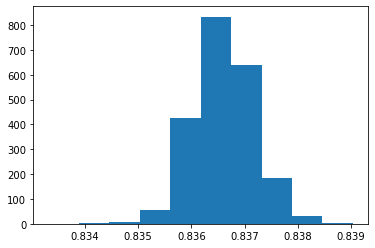

In [18]:
# copy df just to be safe
new_df2 = new_df.copy()
# Feature egineering a few more numerical features
lamb=stats.boxcox_normmax(new_df2.RUNTIME, brack=(-1.9, 1.9)) 
print("Lambda:", lamb)
new_df2['RUNTIME_power'] = (np.power(new_df2.RUNTIME,-1.19068)-1)/-1.19068

plt.hist(new_df2.RUNTIME_power);

Lambda: 0.5472139987198538


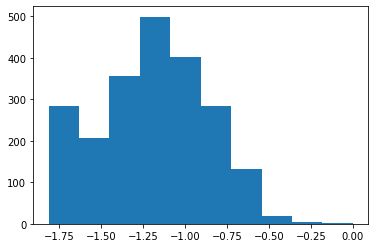

In [19]:
# np.log(df.OPEN_PROPORTION).hist();
lamb=stats.boxcox_normmax(new_df2.OPEN_PROPORTION, brack=(-1.9, 1.9)) 
print("Lambda:", lamb)
new_df2['OPEN_PROPORTION_power'] = (np.power(new_df2.OPEN_PROPORTION,0.5472)-1)/0.5472

plt.hist(new_df2.OPEN_PROPORTION_power);

In [20]:
new_df2.columns

Index(['YEAR', 'EBERT_RATING', 'RUNTIME', 'MOVIELENS_RATING', 'IMDB_RATING',
       'OPEN_PROPORTION', 'GENRE_Comedy', 'GENRE_Crime-Horror', 'GENRE_Drama',
       'GENRE_Family', 'GENRE_Fantasy-Mystery', 'GENRE_Foreign',
       'GENRE_History-Documentary-War', 'GENRE_Indie', 'GENRE_Musical',
       'GENRE_Other', 'GENRE_Romance', 'GENRE_Science Fiction', 'GENRE_Sport',
       'GENRE_Thriller', 'GENRE_Western', 'MPAA_NC-17', 'MPAA_NR', 'MPAA_PG',
       'MPAA_PG-13', 'MPAA_R', 'SUB_GENRE_Adventure', 'SUB_GENRE_Animation',
       'SUB_GENRE_Comedy', 'SUB_GENRE_Crime', 'SUB_GENRE_Documentary',
       'SUB_GENRE_Drama', 'SUB_GENRE_Family', 'SUB_GENRE_Fantasy',
       'SUB_GENRE_Foreign', 'SUB_GENRE_History', 'SUB_GENRE_Horror',
       'SUB_GENRE_Indie', 'SUB_GENRE_Music', 'SUB_GENRE_Musical',
       'SUB_GENRE_Mystery', 'SUB_GENRE_Other', 'SUB_GENRE_Romance',
       'SUB_GENRE_Science Fiction', 'SUB_GENRE_Suspense', 'SUB_GENRE_Thriller',
       'RUNTIME_power', 'OPEN_PROPORTION_power'],
  

### c. CV/test on Final Model

In [21]:
new_df2 = new_df2.drop(['RUNTIME', 'OPEN_PROPORTION'], axis=1)
X, y = new_df2.drop('EBERT_RATING', axis=1), new_df2.EBERT_RATING

#Build a Hold Out Set to test different models
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data into multiple folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Cross Validation on each Model to find the best candidate
# run the CV
X, y = np.array(X), np.array(y)
#collect the validation results for all models
cv_lm_r2s, cv_lm_rid_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_ridge_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [], []

cv_lm_r2s_tr, cv_lm_rid_r2s_tr, cv_lm_lasso_r2s_tr, cv_lm_poly_r2s_tr, cv_lm_poly_ridge_r2s_tr, cv_lm_poly_lasso_r2s_tr = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Feature scaling for train, val and test 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)    
    
    ## Set up models we're choosing from:  

    # Simple Linear Regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))    
    lm_train_preds = lm.predict(X_train)
    linear_train_rmse = mean_squared_error(y_train, lm_train_preds, squared=False)
    linear_train_mae = mean_absolute_error(y_train, lm_train_preds)
    
    lm_val_preds = lm.predict(X_val)
    linear_val_rmse = mean_squared_error(y_val, lm_val_preds, squared=False)
    linear_val_mae = mean_absolute_error(y_val, lm_val_preds)
 #-------------------------------------------------------------------------------------#
    
    # Ridge model
    lm_rid = Ridge(alpha=5)
    lm_rid.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_rid.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_rid.score(X_train_scaled, y_train))
    
    rid_train_preds = lm_rid.predict(X_train_scaled)
    ridge_train_rmse = mean_squared_error(y_train, rid_train_preds, squared=False)
    ridge_train_mae = mean_absolute_error(y_train, rid_train_preds)
    
    rid_val_preds = lm_rid.predict(X_val_scaled)
    ridge_val_rmse = mean_squared_error(y_val, rid_val_preds, squared=False)
    ridge_val_mae = mean_absolute_error(y_val, rid_val_preds)
 #-------------------------------------------------------------------------------------#   
    # Lasso model
    lm_lasso = Lasso(alpha=0.006)
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    lasso_train_preds = lm_lasso.predict(X_train_scaled)
    lasso_train_rmse = mean_squared_error(y_train, lasso_train_preds, squared=False)
    lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
    
    lasso_val_preds = lm_lasso.predict(X_val_scaled)
    lasso_val_rmse = mean_squared_error(y_val, lasso_val_preds, squared=False)
    lasso_val_mae = mean_absolute_error(y_val, lasso_val_preds)
 #-------------------------------------------------------------------------------------#       
    # Poly model
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly_r2s_tr.append(lm_poly.score(X_train_poly, y_train))
    
    poly_train_preds = lm_poly.predict(X_train_poly)
    poly_train_rmse = mean_squared_error(y_train, poly_train_preds, squared=False)
    poly_train_mae = mean_absolute_error(y_train, poly_train_preds)
    
    poly_val_preds = lm_poly.predict(X_val_poly)
    poly_val_rmse = mean_squared_error(y_val, poly_val_preds, squared=False)
    poly_val_mae = mean_absolute_error(y_val, poly_val_preds)
 #-------------------------------------------------------------------------------------#   
    # Poly + Ridge model
    lm_poly_ridge = Ridge(alpha=5)
    lm_poly_ridge.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_ridge_r2s.append(lm_poly_ridge.score(X_val_poly_scaled, y_val))
    cv_lm_poly_ridge_r2s_tr.append(lm_poly_ridge.score(X_train_poly_scaled, y_train))
    
    poly_ridge_train_preds = lm_poly_ridge.predict(X_train_poly_scaled)
    poly_ridge_train_rmse = mean_squared_error(y_train, poly_ridge_train_preds, squared=False)
    poly_ridge_train_mae = mean_absolute_error(y_train, poly_ridge_train_preds)
    
    poly_ridge_val_preds = lm_poly_ridge.predict(X_val_poly_scaled)
    poly_ridge_val_rmse = mean_squared_error(y_val, poly_ridge_val_preds, squared=False)
    poly_ridge_val_mae = mean_absolute_error(y_val, poly_ridge_val_preds)       
 #-------------------------------------------------------------------------------------#   
    # Poly + Lasso 
    lm_poly_lasso = Lasso(alpha=0.006)
    lm_poly_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_r2s.append(lm_poly_lasso.score(X_val_poly_scaled, y_val))
    cv_lm_poly_lasso_r2s_tr.append(lm_poly_lasso.score(X_train_poly_scaled, y_train))
    
    poly_lasso_train_preds = lm_poly_lasso.predict(X_train_poly_scaled)
    poly_lasso_train_rmse = mean_squared_error(y_train, poly_lasso_train_preds, squared=False)
    poly_lasso_train_mae = mean_absolute_error(y_train, poly_lasso_train_preds)
    
    poly_lasso_val_preds = lm_poly_lasso.predict(X_val_poly_scaled)
    poly_lasso_val_rmse = mean_squared_error(y_val, poly_lasso_val_preds, squared=False)
    poly_lasso_val_mae = mean_absolute_error(y_val, poly_lasso_val_preds)    
#############################################################################################
#############################################################################################
print("Models v.3 - ", "\n")
print("Training set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s_tr)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print("Simple RMSE: ", linear_train_rmse)
print("Simple MAE: ", linear_train_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}')
print("Ridge RMSE: ", ridge_train_rmse)
print("Ridge MAE: ", ridge_train_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s_tr)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print("Lasso RMSE: ", lasso_train_rmse)
print("Lasso MAE: ", lasso_train_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s_tr)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s_tr):.3f} +- {np.std(cv_lm_poly_r2s_tr):.3f}')
print("Poly RMSE: ", poly_train_rmse)
print("Poly MAE: ", poly_train_mae, "\n")

print('Poly-Ridge scores: ', cv_lm_poly_ridge_r2s_tr)
print(f'Poly-Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s_tr):.3f} +- {np.std(cv_lm_poly_ridge_r2s_tr):.3f}')
print("Poly-Ridge RMSE: ", poly_ridge_train_rmse)
print("Poly-Ridge MAE: ", poly_ridge_train_mae, "\n")

print('Poly-Lasso scores: ', cv_lm_poly_lasso_r2s_tr)
print(f'Poly-Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s_tr):.3f} +- {np.std(cv_lm_poly_lasso_r2s_tr):.3f}')
print("Poly-Lasso RMSE: ", poly_lasso_train_rmse)
print("Poly-Lasso MAE: ", poly_lasso_train_mae, "\n")
#-------------------------------------------------------------------------------------#
print("Val set scores: ", "\n")
print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print("Simple RMSE: ", linear_val_rmse)
print("Simple MAE: ", linear_val_mae, "\n")

print('Ridge scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}')
print("Ridge RMSE: ", ridge_val_rmse)
print("Ridge MAE: ", ridge_val_mae, "\n")

print('Lasso scores: ', cv_lm_lasso_r2s)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')
print("Lasso RMSE: ", lasso_val_rmse)
print("Lasso MAE: ", lasso_val_mae, "\n")

print('Poly scores: ', cv_lm_poly_r2s)
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print("Poly RMSE: ", poly_val_rmse)
print("Poly MAE: ", poly_val_mae, "\n")

print('Poly-Ridge scores: ', cv_lm_poly_ridge_r2s)
print(f'Poly-Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s):.3f} +- {np.std(cv_lm_poly_ridge_r2s):.3f}')
print("Poly-Ridge RMSE: ", poly_ridge_val_rmse)
print("Poly-Ridge MAE: ", poly_ridge_val_mae, "\n")

print('Poly-Lasso scores: ', cv_lm_poly_lasso_r2s)
print(f'Poly-Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}')
print("Poly-Lasso RMSE: ", poly_lasso_val_rmse)
print("Poly-Lasso MAE: ", poly_lasso_val_mae, "\n")

Models v.3 -  

Training set scores:  

Simple regression scores:  [0.4099114042722627, 0.4084511389970261, 0.4050749049641492, 0.40346157132796867, 0.41222116527863617]
Simple mean cv r^2: 0.408 +- 0.003
Simple RMSE:  0.6795331864610348
Simple MAE:  0.544156023098431 

Ridge scores:  [0.40956814954178133, 0.408330048384406, 0.4049514488285313, 0.40334602759119587, 0.4121335996999729]
Ridge mean cv r^2: 0.408 +- 0.003
Ridge RMSE:  0.6795838020133232
Ridge MAE:  0.544241192587596 

Lasso scores:  [0.4052964123911261, 0.40555963665195305, 0.4019236028179175, 0.3992368194457018, 0.40925054693381024]
Lasso mean cv r^2: 0.404 +- 0.003
Lasso RMSE:  0.6812481934715713
Lasso MAE:  0.5478819312441078 

Poly scores:  [0.5833537417950219, 0.5756437762453861, 0.5825975363926192, 0.5718801016717242, 0.5852004134220385]
Poly mean cv r^2: 0.580 +- 0.005
Poly RMSE:  0.5708511193161672
Poly MAE:  0.44047596677030026 

Poly-Ridge scores:  [0.5333171805890169, 0.5246702768311468, 0.5324107137735862, 0.52

In [22]:
#test - linear
lm.fit(X, y)
lm_preds = lm.predict(X_test)

linear_test_rmse = mean_squared_error(y_test, lm_preds, squared=False)
linear_test_mae = mean_absolute_error(y_test, lm_preds)
linear_test_r2 = lm.score(X_test, y_test)

#test - Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
lm_rid.fit(X_scaled, y)
ridge_preds = lm_rid.predict(X_test_scaled)

ridge_test_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
ridge_test_mae = mean_absolute_error(y_test, ridge_preds)
ridge_test_r2 = lm_rid.score(X_test_scaled, y_test)

#test - Lasso
lm_lasso.fit(X_scaled, y)
lasso_preds = lm_lasso.predict(X_test_scaled)

lasso_test_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y_test, lasso_preds)
lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)

#test - poly
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

lm_poly.fit(X_poly, y)
poly_preds = lm_poly.predict(X_test_poly)

poly_test_rmse = mean_squared_error(y_test, poly_preds, squared=False)
poly_test_mae = mean_absolute_error(y_test, poly_preds)
poly_test_r2 = lm_poly.score(X_test_poly, y_test)

#test - Poly-Ridge
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
lm_poly_ridge.fit(X_poly_scaled, y)
poly_ridge_test_preds = lm_poly_ridge.predict(X_test_poly_scaled)

poly_ridge_test_rmse = mean_squared_error(y_test, poly_ridge_test_preds, squared=False)
poly_ridge_test_mae = mean_absolute_error(y_test, poly_ridge_test_preds)   
poly_ridge_test_r2 = lm_poly_ridge.score(X_test_poly_scaled, y_test)

#test - Poly-Lasso
lm_poly_lasso.fit(X_poly_scaled, y)
poly_lasso_test_preds = lm_poly_lasso.predict(X_test_poly_scaled)

poly_lasso_test_rmse = mean_squared_error(y_test, poly_lasso_test_preds, squared=False)
poly_lasso_test_mae = mean_absolute_error(y_test, poly_lasso_test_preds)
poly_lasso_test_r2 = lm_poly_lasso.score(X_test_poly_scaled, y_test)

column_list = ['Model_Type', 'R-squared', 'RMSE', 'MAE']

linear_dict = dict(zip(column_list, ['Simple Linear', linear_test_r2, linear_test_rmse, linear_test_mae]))
ridge_dict = dict(zip(column_list, ['Ridge', ridge_test_r2, ridge_test_rmse, ridge_test_mae]))
lasso_dict = dict(zip(column_list, ['LASSO', lasso_test_r2, lasso_test_rmse, lasso_test_mae]))
poly_dict = dict(zip(column_list, ['Polynomial', poly_test_r2, poly_test_rmse, poly_test_mae]))
poly_ridge_dict = dict(zip(column_list, ['Polynomial-Ridge', poly_ridge_test_r2, poly_ridge_test_rmse, poly_ridge_test_mae]))
poly_lasso_dict = dict(zip(column_list, ['Polynomial-Lasso', poly_lasso_test_r2, poly_lasso_test_rmse, poly_lasso_test_mae]))


score_df = pd.DataFrame([linear_dict, ridge_dict, lasso_dict, poly_dict, poly_ridge_dict, poly_lasso_dict])
score_df

,Model_Type,R-squared,RMSE,MAE
0,Simple Linear,0.370814,0.707413,0.559769
1,Ridge,0.370269,0.707719,0.559934
2,LASSO,0.371052,0.707279,0.558852
3,Polynomial,-4077.738195,56.956874,9.702674
4,Polynomial-Ridge,0.261119,0.766603,0.603869
5,Polynomial-Lasso,0.345374,0.721572,0.573735


LASSO still has a better outcome than the rest... just by a bit. Since it has the capacity to address the overfitting issue, I'll use LASSO for the final model, instead of simple linear regression.

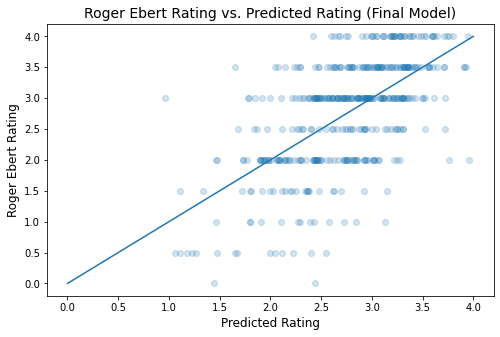

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(lasso_preds, y_test, alpha=0.2)
plt.plot([0,4], [0,4])
plt.title('Roger Ebert Rating vs. Predicted Rating (Final Model)', fontsize=14)
plt.xlabel('Predicted Rating', fontsize=12)
plt.ylabel('Roger Ebert Rating', fontsize=12)
plt.savefig('./image/final_comparison.png');

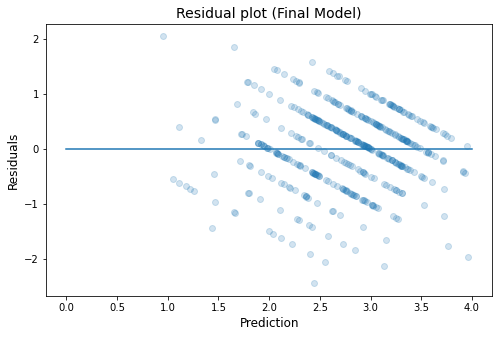

In [24]:
# Residual plot
residuals = y_test - lasso_preds
plt.figure(figsize=(8,5))
plt.scatter(lasso_preds, residuals, alpha=0.2)
plt.plot([0, 4], [0, 0])
plt.title("Residual plot (Final Model)", size=14)
plt.xlabel("Prediction", size=12)
plt.ylabel("Residuals", size=12)
plt.savefig('./image/residual_final.png');

In [25]:
# Lasso feature selection
yL = new_df2['EBERT_RATING']
XL = new_df2.drop(['EBERT_RATING'],axis=1)

reg = LassoCV()
reg.fit(XL, yL)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(XL,yL))

coef = pd.Series(reg.coef_ , index=XL.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.002521
Best score using built-in LassoCV: 0.390209
Lasso picked 23 variables and eliminated the other 22 variables


Text(0.5, 0, 'Coefficient')

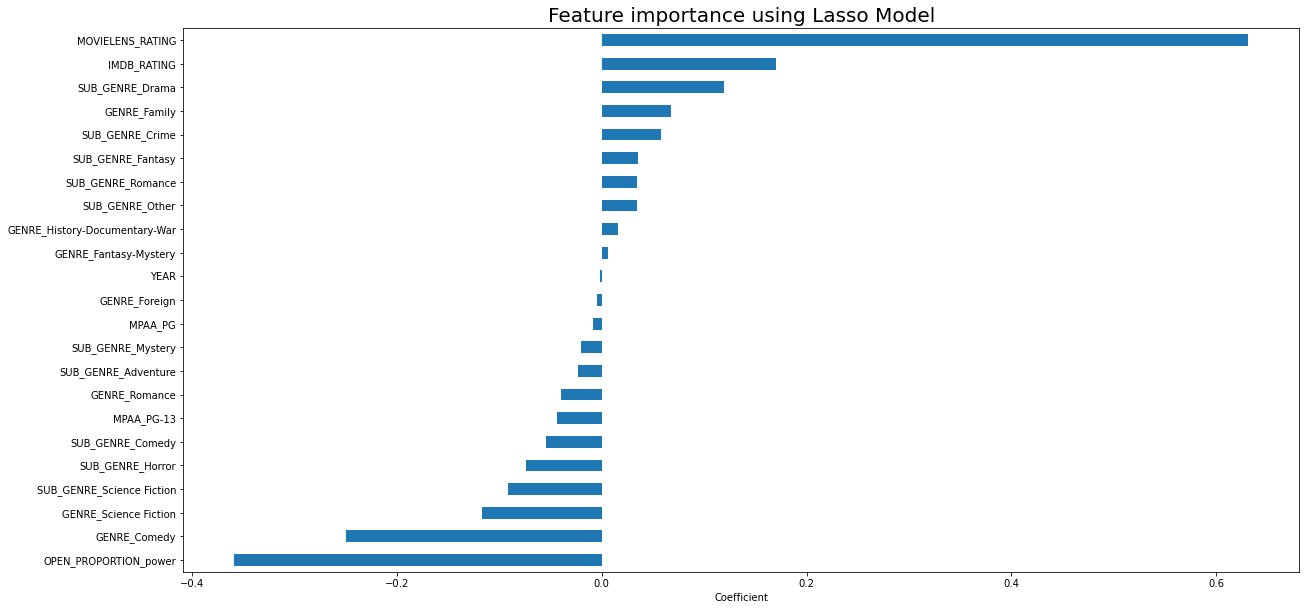

In [26]:
noz_coef = coef[coef != 0]
lmp_coef = noz_coef.sort_values()
neg_coef = abs(lmp_coef[lmp_coef < 0]).sort_values()
pos_coef = lmp_coef[lmp_coef > 0]
plt.rcParams['figure.figsize'] = (20.0, 10.0)
lmp_coef.plot(kind='barh')
plt.title("Feature importance using Lasso Model", size=20)
plt.xlabel("Coefficient")

In [27]:
new_df2.to_pickle('./data/final_model.pickle')

## 4. Diagnostic plot

In [28]:
#Assumption 1:regression is linear in parameters and correctly specified

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y)
#     plt.plot([0,4.5],[0,4.5])
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.plot([0,4.5],[0,0])
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot") #quantile to quantile plot 
    

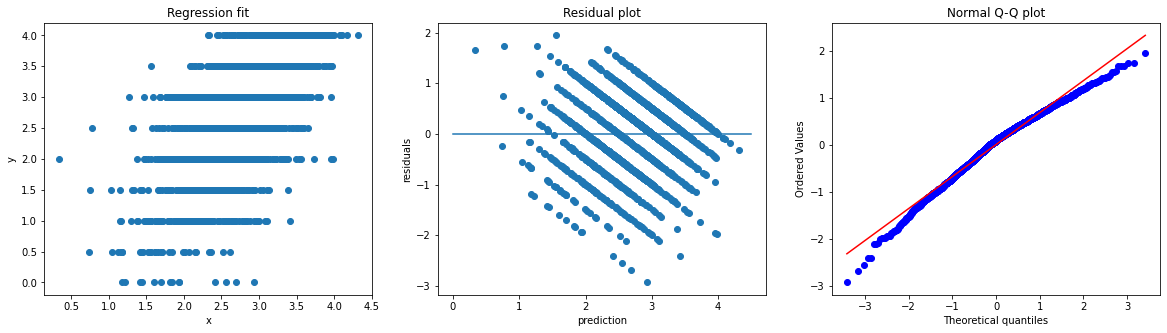

In [29]:
import scipy.stats as stats

x=new_df2.drop(['EBERT_RATING'],axis=1)
y=new_df2['EBERT_RATING']

diagnostic_plot (x, y)
plt.savefig('./image/diagnostic_plots.png');

## 5. Prediction on new movies using entire dataset

In [30]:
# Whole dataset training with lasso
X, y = new_df2.drop('EBERT_RATING', axis=1), new_df2.EBERT_RATING

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lm_lasso.fit(X_scaled, y)
lasso_preds = lm_lasso.predict(X_scaled)

lasso_test_rmse = mean_squared_error(y, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y, lasso_preds)
lasso_test_r2 = lm_lasso.score(X_scaled, y)

print(lasso_test_r2)
print(lasso_test_rmse)
print(lasso_test_mae)

0.3960822586825289
0.6862217775010391
0.5516540108853508


In [31]:
coef = pd.Series(lm_lasso.coef_ , index=XL.columns)
coef

YEAR                            -0.013028
MOVIELENS_RATING                 0.311290
IMDB_RATING                      0.128731
GENRE_Comedy                    -0.059533
GENRE_Crime-Horror              -0.000000
GENRE_Drama                      0.000000
GENRE_Family                     0.026462
GENRE_Fantasy-Mystery            0.017107
GENRE_Foreign                   -0.015486
GENRE_History-Documentary-War    0.003961
GENRE_Indie                      0.005431
GENRE_Musical                    0.000000
GENRE_Other                     -0.008771
GENRE_Romance                   -0.016873
GENRE_Science Fiction           -0.042445
GENRE_Sport                      0.000000
GENRE_Thriller                  -0.000000
GENRE_Western                   -0.007997
MPAA_NC-17                       0.000000
MPAA_NR                          0.006424
MPAA_PG                         -0.006903
MPAA_PG-13                      -0.023063
MPAA_R                          -0.000000
SUB_GENRE_Adventure             -0

In [32]:
# Test unseen data
columns = ['YEAR', 'MOVIELENS_RATING', 'IMDB_RATING',
       'GENRE_Comedy', 'GENRE_Crime-Horror', 'GENRE_Drama', 'GENRE_Family',
       'GENRE_Fantasy-Mystery', 'GENRE_Foreign',
       'GENRE_History-Documentary-War', 'GENRE_Indie', 'GENRE_Musical',
       'GENRE_Other', 'GENRE_Romance', 'GENRE_Science Fiction', 'GENRE_Sport',
       'GENRE_Thriller', 'GENRE_Western', 'MPAA_NC-17', 'MPAA_NR', 'MPAA_PG',
       'MPAA_PG-13', 'MPAA_R', 'SUB_GENRE_Adventure', 'SUB_GENRE_Animation',
       'SUB_GENRE_Comedy', 'SUB_GENRE_Crime', 'SUB_GENRE_Documentary',
       'SUB_GENRE_Drama', 'SUB_GENRE_Family', 'SUB_GENRE_Fantasy',
       'SUB_GENRE_Foreign', 'SUB_GENRE_History', 'SUB_GENRE_Horror',
       'SUB_GENRE_Indie', 'SUB_GENRE_Music', 'SUB_GENRE_Musical',
       'SUB_GENRE_Mystery', 'SUB_GENRE_Other', 'SUB_GENRE_Romance',
       'SUB_GENRE_Science Fiction', 'SUB_GENRE_Suspense', 'SUB_GENRE_Thriller',
       'RUNTIME', 'OPEN_PROPORTION']

minari = dict(zip(columns, [2021, 3.82, 7.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
                            0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115, 0.018616652]))

godzilla = dict(zip(columns, [2021, 3.05, 6.5, 0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,
                             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,113,0.09509746]))

knivesout = dict(zip(columns, [2019, 4.06, 7.9, 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
                              0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131, 0.08596562]))

tenet = dict(zip(columns, [2020, 3.6, 7.5, 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
                          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,150, 0.055627614]))

test_df = pd.DataFrame([minari, godzilla, knivesout, tenet])
test_df

,YEAR,MOVIELENS_RATING,IMDB_RATING,GENRE_Comedy,GENRE_Crime-Horror,GENRE_Drama,GENRE_Family,GENRE_Fantasy-Mystery,GENRE_Foreign,GENRE_History-Documentary-War,...,SUB_GENRE_Music,SUB_GENRE_Musical,SUB_GENRE_Mystery,SUB_GENRE_Other,SUB_GENRE_Romance,SUB_GENRE_Science Fiction,SUB_GENRE_Suspense,SUB_GENRE_Thriller,RUNTIME,OPEN_PROPORTION
0,2021,3.82,7.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,115,0.018617
1,2021,3.05,6.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,113,0.095097
2,2019,4.06,7.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,131,0.085966
3,2020,3.60,7.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,150,0.055628


In [33]:
# scale features
test_df['RUNTIME_power'] = (np.power(test_df.RUNTIME,-1.19068)-1)/-1.19068
test_df['OPEN_PROPORTION_power'] = (np.power(test_df.OPEN_PROPORTION,0.5472)-1)/0.5472
test_df.drop(['RUNTIME','OPEN_PROPORTION'], axis=1, inplace=True)

X1 = np.array(test_df.loc[0]).reshape(1, 45)
X2 = np.array(test_df.loc[1]).reshape(1, 45)
X3 = np.array(test_df.loc[2]).reshape(1, 45)
X4 = np.array(test_df.loc[3]).reshape(1, 45)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #original data
X1_scaled = scaler.transform(X1)
X2_scaled = scaler.transform(X2)
X3_scaled = scaler.transform(X3)
X4_scaled = scaler.transform(X4)

In [34]:
minari_pred = lm_lasso.predict(X1_scaled)
godzilla_pred = lm_lasso.predict(X2_scaled)
knivesout_pred = lm_lasso.predict(X3_scaled)
tenet_pred = lm_lasso.predict(X4_scaled)

print(f"Predicted Ebert Rating for Minari is {minari_pred}")
print(f"Predicted Ebert Rating for Godzilla and Kong is {godzilla_pred}")
print(f"Predicted Ebert Rating for Knives Out is {knivesout_pred}")
print(f"Predicted Ebert Rating for Tenet is {tenet_pred}")

Predicted Ebert Rating for Minari is [3.52408233]
Predicted Ebert Rating for Godzilla and Kong is [2.62456157]
Predicted Ebert Rating for Knives Out is [3.37707323]
Predicted Ebert Rating for Tenet is [3.51699406]


In [35]:
# columns = ['YEAR', 'MOVIELENS_RATING', 'IMDB_RATING',
#        'GENRE_Comedy', 'GENRE_Crime-Horror', 'GENRE_Drama', 'GENRE_Family',
#        'GENRE_Fantasy-Mystery', 'GENRE_Foreign',
#        'GENRE_History-Documentary-War', 'GENRE_Indie', 'GENRE_Musical',
#        'GENRE_Other', 'GENRE_Romance', 'GENRE_Science Fiction', 'GENRE_Sport',
#        'GENRE_Thriller', 'GENRE_Western', 'MPAA_NC-17', 'MPAA_NR', 'MPAA_PG',
#        'MPAA_PG-13', 'MPAA_R', 'SUB_GENRE_Adventure', 'SUB_GENRE_Animation',
#        'SUB_GENRE_Comedy', 'SUB_GENRE_Crime', 'SUB_GENRE_Documentary',
#        'SUB_GENRE_Drama', 'SUB_GENRE_Family', 'SUB_GENRE_Fantasy',
#        'SUB_GENRE_Foreign', 'SUB_GENRE_History', 'SUB_GENRE_Horror',
#        'SUB_GENRE_Indie', 'SUB_GENRE_Music', 'SUB_GENRE_Musical',
#        'SUB_GENRE_Mystery', 'SUB_GENRE_Other', 'SUB_GENRE_Romance',
#        'SUB_GENRE_Science Fiction', 'SUB_GENRE_Suspense', 'SUB_GENRE_Thriller',
#        'RUNTIME', 'OPEN_PROPORTION']

# lifeofpi = dict(zip(columns, [2012, 3.68, 7.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,
#                             0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127, 0.036865194]))

# pitchperfect = dict(zip(columns, [2012, 3.52, 7.1, 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
#                              0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,112,0.044641717]))

# nightmare = dict(zip(columns, [2010, 2.54, 5.2, 0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
#                               0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,95, 0.284387806]))

# test_df2 = pd.DataFrame([lifeofpi, pitchperfect, nightmare])
# test_df2

,YEAR,MOVIELENS_RATING,IMDB_RATING,GENRE_Comedy,GENRE_Crime-Horror,GENRE_Drama,GENRE_Family,GENRE_Fantasy-Mystery,GENRE_Foreign,GENRE_History-Documentary-War,...,SUB_GENRE_Music,SUB_GENRE_Musical,SUB_GENRE_Mystery,SUB_GENRE_Other,SUB_GENRE_Romance,SUB_GENRE_Science Fiction,SUB_GENRE_Suspense,SUB_GENRE_Thriller,RUNTIME,OPEN_PROPORTION
0,2012,3.68,7.9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,127,0.036865
1,2012,3.52,7.1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,112,0.044642
2,2010,2.54,5.2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,95,0.284388


In [38]:
# # scale features
# # test_df2['RUNTIME_power'] = (np.power(test_df2.RUNTIME,-1.19068)-1)/-1.19068
# # test_df2['OPEN_PROPORTION_power'] = (np.power(test_df2.OPEN_PROPORTION,0.5472)-1)/0.5472
# # test_df2.drop(['RUNTIME','OPEN_PROPORTION'], axis=1, inplace=True)

# X1 = np.array(test_df2.loc[0]).reshape(1, 45)
# X2 = np.array(test_df2.loc[1]).reshape(1, 45)
# X3 = np.array(test_df2.loc[2]).reshape(1, 45)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) #original data
# X1_scaled = scaler.transform(X1)
# X2_scaled = scaler.transform(X2)
# X3_scaled = scaler.transform(X3)

In [39]:
# lifeofpi_pred = lm_lasso.predict(X1_scaled)
# pitchperfect_pred = lm_lasso.predict(X2_scaled)
# nightmare_pred = lm_lasso.predict(X3_scaled)


# print(f"Predicted Ebert Rating for Life of Pi is {lifeofpi_pred}")
# print(f"Predicted Ebert Rating for Pitch Perfect is {pitchperfect_pred}")
# print(f"Predicted Ebert Rating for Nightmare on elm street is {nightmare_pred}")


Predicted Ebert Rating for Life of Pi is [3.50368491]
Predicted Ebert Rating for Pitch Perfect is [2.82471435]
Predicted Ebert Rating for Nightmare on elm street is [1.79963706]
